# Analysis: Fastest-Inflating Food Categories (CPI & PPI)

## Analysis Question: Which food categories have had the fastest increase in prices over the past 20–50 years?

We will explore this question using two preprocessed forecast datasets:

- Historical Consumer Price Index (CPI) forecast series  
- Historical Producer Price Index (PPI) forecast series  

Each contains annual percent-change forecasts by food-related category from 1974–2024.

To quantify "fastest increase," we will measure the average annual percent change in each category over different time windows:

- A long-run window (~50 years): 1974–2024* 
- A recent window (20 years): 2004–2024

For each dataset (CPI and PPI), we will:

1. Convert wide data to tidy long format (`Year`, `category`, `pct_change`)  
2. Compute mean annual inflation by category within each window  
3. Rank categories and identify the top 5 fastest-inflating categories  
4. Compare whether categories that inflate quickly in CPI also do so in PPI


## Imports + Load Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["axes.grid"] = True

cpi_wide = pd.read_csv("../data/processed/processed_cpi.csv")
ppi_wide = pd.read_csv("../data/processed/processed_ppi.csv")

display(cpi_wide.head()) 
display(ppi_wide.head())

,Year,All_food,Beef_and_veal,Cereals_and_bakery_products,Dairy_products,Eggs,Fats_and_oils,Fish_and_seafood,Food_at_home,Food_away_from_home,...,Fruits_and_vegetables,Meats,Meats_poultry_and_fish,Nonalcoholic_beverages,Other_foods,Other_meats,Pork,Poultry,Processed_fruits_and_vegetables,Sugar_and_sweets
0,1974,14.3,2.9,29.9,18.6,0.4,41.9,15.3,14.9,12.7,...,16.5,1.8,2.2,19.3,21.4,3.1,-0.5,-5.1,NaN,52.4
1,1975,8.5,1.0,11.3,3.1,-1.8,10.7,8.5,8.2,9.4,...,3.1,8.5,8.5,15.0,12.8,5.9,22.4,10.5,NaN,26.1
2,1976,3.0,-3.2,-2.2,8.1,9.2,-12.5,11.7,2.1,6.8,...,2.6,0.2,0.9,19.6,4.1,5.9,1.3,-4.1,NaN,-11.3
3,1977,6.3,-0.7,1.6,2.7,-3.2,10.1,10.8,5.9,7.6,...,9.2,-2.3,-0.6,50.6,3.4,-0.6,-5.4,0.7,NaN,5.0
4,1978,9.9,22.9,9.0,6.8,-5.4,9.6,9.4,10.5,9.1,...,11.1,18.6,16.7,5.8,8.0,17.7,12.9,10.4,NaN,12.3


,Year,Farm_level_cattle,Farm_level_eggs,Farm_level_fruit,Farm_level_milk,Farm_level_soybeans,Farm_level_vegetables,Farm_level_wheat,Finished_consumer_foods,Processed_foods_and_feeds,Unprocessed_foodstuffs_and_feedstuffs,Wholesale_beef,Wholesale_dairy,Wholesale_fats_and_oils,Wholesale_pork,Wholesale_poultry,Wholesale_wheat_flour
0,1974,-10.2,-3.0,6.3,19.3,-4.7,17.4,33.3,14.0,18.9,5.2,-3.1,11.6,59.4,1.1,-11.3,29.4
1,1975,-1.7,-0.6,9.5,4.2,-18.4,-8.7,-19.7,8.4,-2.4,1.3,11.1,6.5,-13.1,32.4,17.0,-13.5
2,1976,-7.1,12.1,1.2,11.6,6.0,-7.7,-13.3,-0.3,-5.1,-0.8,-11.4,8.1,-20.9,-6.2,-9.7,-9.5
3,1977,2.3,-9.6,11.1,0.8,18.8,3.7,-22.5,5.3,2.8,0.9,0.9,3.0,16.5,-5.6,4.3,-19.6
4,1978,32.4,-2.1,20.3,8.4,-5.8,7.0,24.3,9.0,6.5,12.6,28.3,8.6,8.5,15.3,12.0,19.1


## Convert to tidy long format

The preprocessed files are in wide format (one column per category). For analysis, we will convert them to long format with columns:

- `Year`
- `category`
- `pct_change` (annual percent change forecast)

In [2]:
def wide_to_long(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert wide-format data (Year + category columns) into long format.

    Returns a DataFrame with columns: Year, category, pct_change.
    """
    long_df = df.melt(
        id_vars="Year",
        var_name="category",
        value_name="pct_change",
    )
    return long_df

cpi_long = wide_to_long(cpi_wide)
ppi_long = wide_to_long(ppi_wide)

display(cpi_long.head())
display(ppi_long.head())

,Year,category,pct_change
0,1974,All_food,14.3
1,1975,All_food,8.5
2,1976,All_food,3.0
3,1977,All_food,6.3
4,1978,All_food,9.9


,Year,category,pct_change
0,1974,Farm_level_cattle,-10.2
1,1975,Farm_level_cattle,-1.7
2,1976,Farm_level_cattle,-7.1
3,1977,Farm_level_cattle,2.3
4,1978,Farm_level_cattle,32.4


## Defining the metric: average annual percent change

For each category and time window, we compute `pct_change,' which is the annual percent change forecast in that category. A higher value means the category is, on average, expected to experience faster price growth in that period.


In [3]:
# Helper function:
def mean_inflation_by_category(df_long: pd.DataFrame,
                               start_year: int,
                               end_year: int) -> pd.Series:
    """
    Compute mean annual percent change per category within a given year window.

    Parameters
    ----------
    df_long : pd.DataFrame
        Long-format data with columns: Year, category, pct_change.
    start_year : int
        Inclusive start of the window.
    end_year : int
        Inclusive end of the window.

    Returns
    -------
    pd.Series
        Mean pct_change per category, sorted descending order.
    """
    window = df_long[
        (df_long["Year"] >= start_year) & (df_long["Year"] <= end_year)
    ]
    means = (
        window.groupby("category")["pct_change"]
        .mean()
        .sort_values(ascending=False)
    )
    return means

# Define Time Windows:
full_start, full_end = 1974, 2024   # ~50-year window
recent_start, recent_end = 2004, 2024  # Last 20 years

## CPI: Fastest-inflating categories (long-run vs last 20 years)

We first look at CPI forecasts and compute average annual inflation by category for:

- 1974–2024 (approximately 50 years)
- 2004–2024 (recent 20-year window)


### Compute Means

In [4]:
cpi_mean_full = mean_inflation_by_category(cpi_long, full_start, full_end)
cpi_mean_recent = mean_inflation_by_category(cpi_long, recent_start, recent_end)

display(cpi_mean_full.head())
display(cpi_mean_recent.head())

category
Sugar_and_sweets               4.588235
Fresh_fruits                   4.576471
Cereals_and_bakery_products    4.321569
Food_away_from_home            4.278431
Fresh_fruits_and_vegetables    4.268627
Name: pct_change, dtype: float64

category
Beef_and_veal          4.395238
Eggs                   4.304762
Fats_and_oils          3.519048
Food_away_from_home    3.423810
Meats                  3.376190
Name: pct_change, dtype: float64

### Top 5 Tables

In [5]:
cpi_top5_full = cpi_mean_full.head(5)
cpi_top5_recent = cpi_mean_recent.head(5)

display(cpi_top5_full)
display(cpi_top5_recent)

category
Sugar_and_sweets               4.588235
Fresh_fruits                   4.576471
Cereals_and_bakery_products    4.321569
Food_away_from_home            4.278431
Fresh_fruits_and_vegetables    4.268627
Name: pct_change, dtype: float64

category
Beef_and_veal          4.395238
Eggs                   4.304762
Fats_and_oils          3.519048
Food_away_from_home    3.423810
Meats                  3.376190
Name: pct_change, dtype: float64

### Bar Plots

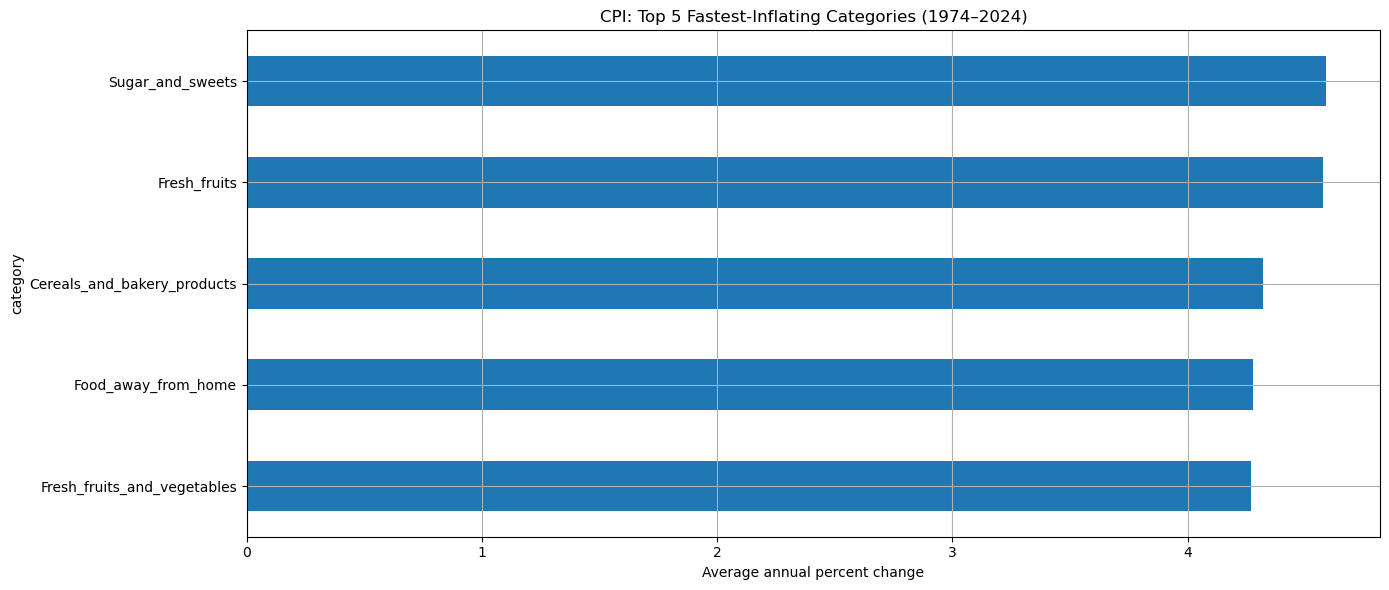

In [6]:
fig, ax = plt.subplots()
cpi_top5_full.plot(kind="barh", ax=ax)
plt.gca().invert_yaxis() # top to bottom
ax.set_title("CPI: Top 5 Fastest-Inflating Categories (1974–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.savefig('../figures/cpi_top_5_inflating_categories_1974_2024.png')
plt.show()

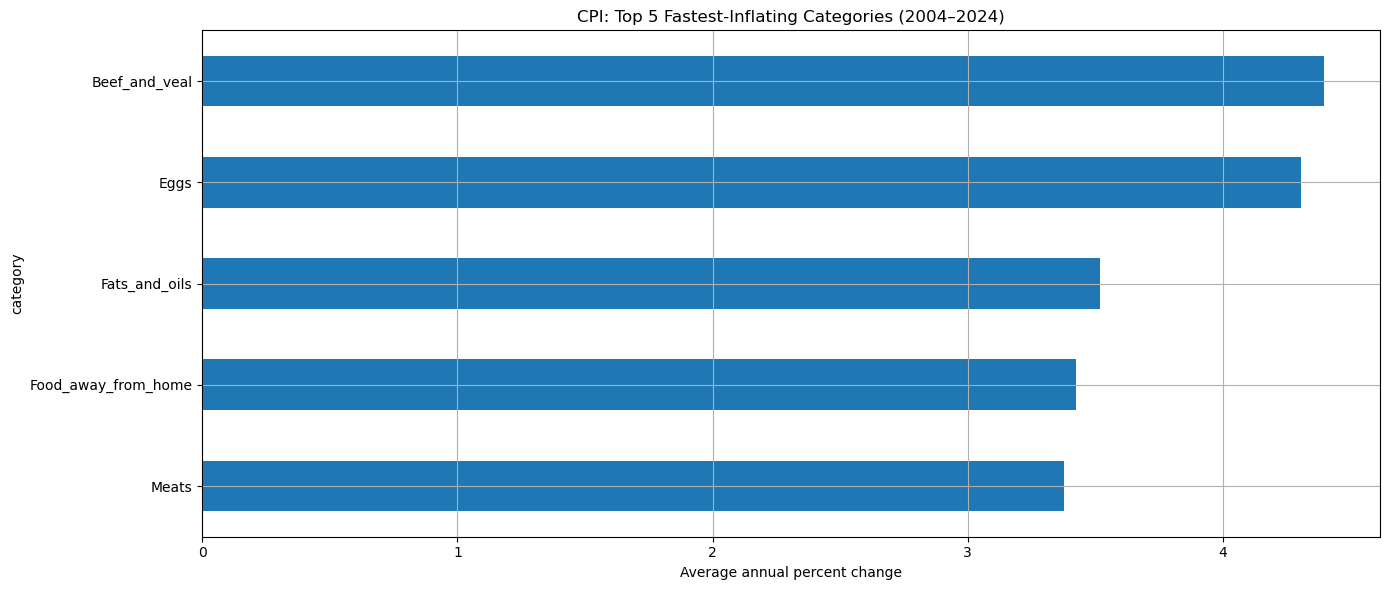

In [7]:
fig, ax = plt.subplots()
cpi_top5_recent.plot(kind="barh", ax=ax)
plt.gca().invert_yaxis() # top to bottom
ax.set_title("CPI: Top 5 Fastest-Inflating Categories (2004–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.savefig('../figures/cpi_top_5_inflating_categories_2004_2024.png')
plt.show()

## PPI: Fastest-inflating categories (long-run vs last 20 years)

We will now repeat the same analysis using PPI forecasts, which focus on producer-level prices.


### Compute means

In [8]:
ppi_mean_full = mean_inflation_by_category(ppi_long, full_start, full_end)
ppi_mean_recent = mean_inflation_by_category(ppi_long, recent_start, recent_end)

display(ppi_mean_full.head())
display(ppi_mean_recent.head())

category
Farm_level_eggs            6.534694
Wholesale_fats_and_oils    4.131373
Farm_level_milk            3.476471
Farm_level_vegetables      3.450980
Wholesale_beef             3.409804
Name: pct_change, dtype: float64

category
Farm_level_eggs            13.176190
Farm_level_wheat            5.128571
Farm_level_milk             4.914286
Wholesale_fats_and_oils     4.890476
Farm_level_vegetables       4.747619
Name: pct_change, dtype: float64

### Top 5 Tables

In [9]:
ppi_top5_full = ppi_mean_full.head(5)
ppi_top5_recent = ppi_mean_recent.head(5)

display(ppi_top5_full)
display(ppi_top5_recent)

category
Farm_level_eggs            6.534694
Wholesale_fats_and_oils    4.131373
Farm_level_milk            3.476471
Farm_level_vegetables      3.450980
Wholesale_beef             3.409804
Name: pct_change, dtype: float64

category
Farm_level_eggs            13.176190
Farm_level_wheat            5.128571
Farm_level_milk             4.914286
Wholesale_fats_and_oils     4.890476
Farm_level_vegetables       4.747619
Name: pct_change, dtype: float64

### Bar Plots 

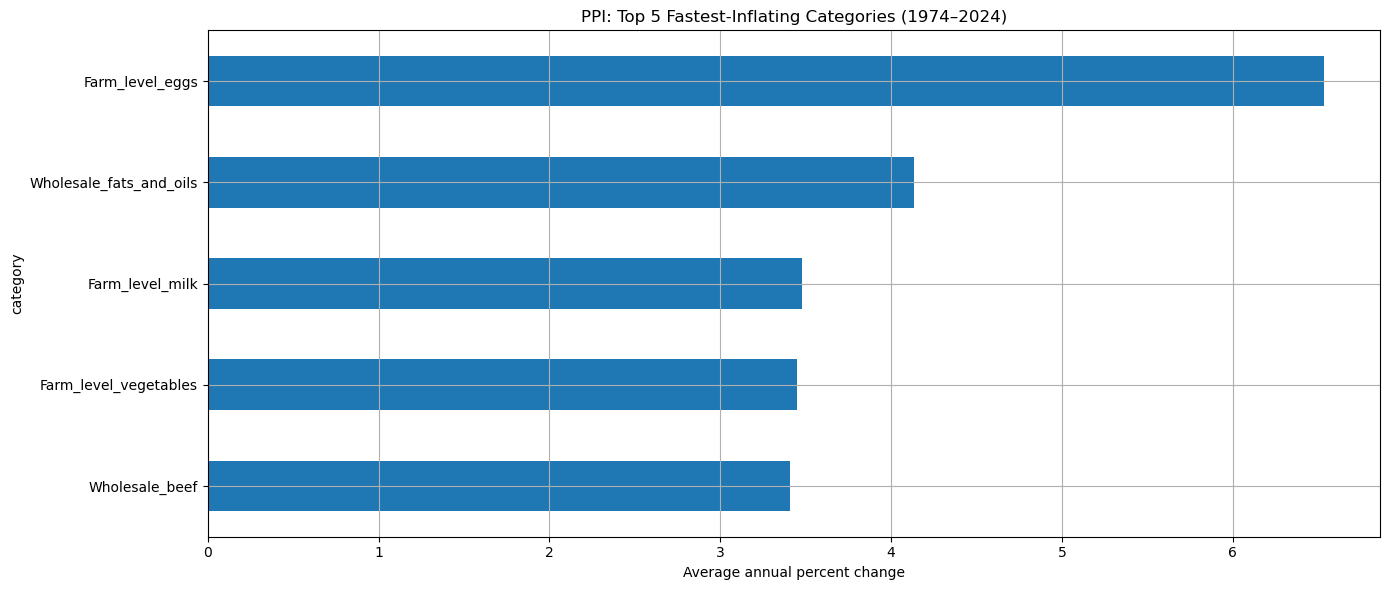

In [10]:
fig, ax = plt.subplots()
ppi_top5_full.plot(kind="barh", ax=ax)
plt.gca().invert_yaxis() # top to bottom
ax.set_title("PPI: Top 5 Fastest-Inflating Categories (1974–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.savefig('../figures/ppi_top_5_inflating_categories_1974_2024.png')
plt.show()

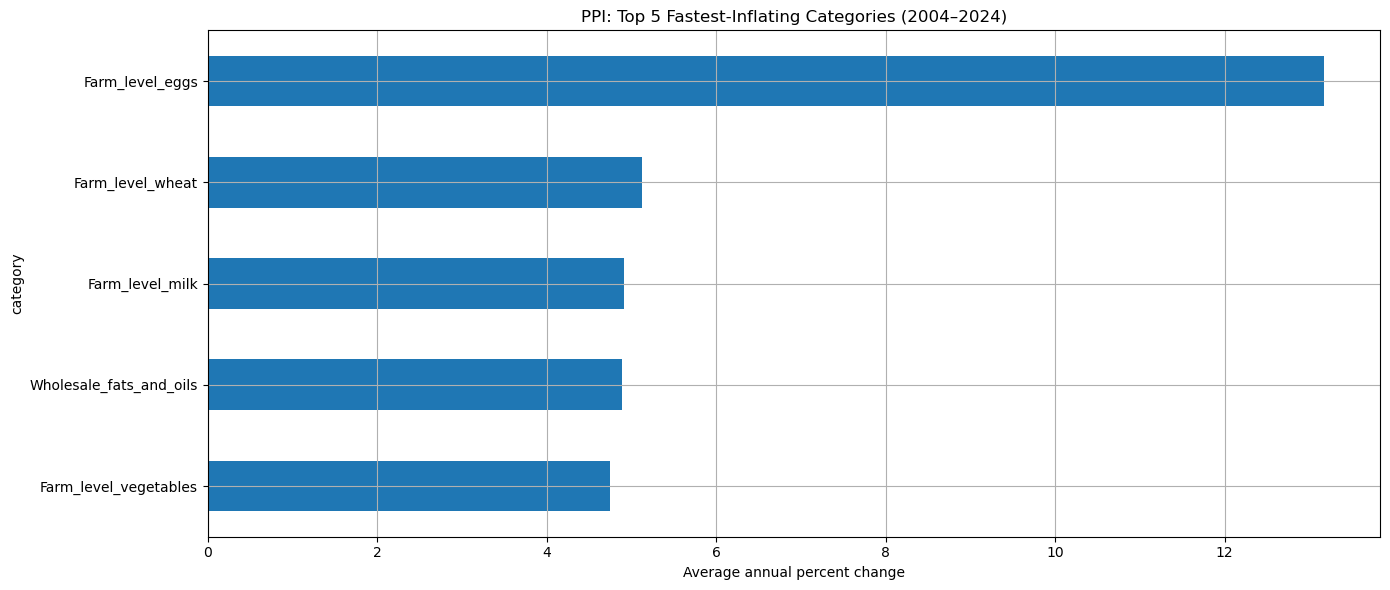

In [11]:
fig, ax = plt.subplots()
ppi_top5_recent.plot(kind="barh", ax=ax)
plt.gca().invert_yaxis() # top to bottom
ax.set_title("PPI: Top 5 Fastest-Inflating Categories (2004–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.savefig('../figures/ppi_top_5_inflating_categories_2004_2024.png')
plt.show()

# Side-by-Side Comparison Tables

## CPI:

In [12]:
cpi_q1_summary = pd.DataFrame({
    "CPI_top5_full": cpi_top5_full.index,
    "CPI_full_mean": cpi_top5_full.values,
    "CPI_top5_recent": cpi_top5_recent.index,
    "CPI_recent_mean": cpi_top5_recent.values,
})

cpi_q1_summary

,CPI_top5_full,CPI_full_mean,CPI_top5_recent,CPI_recent_mean
0,Sugar_and_sweets,4.588235,Beef_and_veal,4.395238
1,Fresh_fruits,4.576471,Eggs,4.304762
2,Cereals_and_bakery_products,4.321569,Fats_and_oils,3.519048
3,Food_away_from_home,4.278431,Food_away_from_home,3.423810
4,Fresh_fruits_and_vegetables,4.268627,Meats,3.376190


## PPI:

In [13]:
ppi_q1_summary = pd.DataFrame({
    "PPI_top5_full": ppi_top5_full.index,
    "PPI_full_mean": ppi_top5_full.values,
    "PPI_top5_recent": ppi_top5_recent.index,
    "PPI_recent_mean": ppi_top5_recent.values,
})

ppi_q1_summary

,PPI_top5_full,PPI_full_mean,PPI_top5_recent,PPI_recent_mean
0,Farm_level_eggs,6.534694,Farm_level_eggs,13.176190
1,Wholesale_fats_and_oils,4.131373,Farm_level_wheat,5.128571
2,Farm_level_milk,3.476471,Farm_level_milk,4.914286
3,Farm_level_vegetables,3.450980,Wholesale_fats_and_oils,4.890476
4,Wholesale_beef,3.409804,Farm_level_vegetables,4.747619


# Combine CPI + PPI into a single comparison table

In [14]:
combined_q1_summary = pd.DataFrame({
    "CPI_top5_full": cpi_top5_full.index,
    "CPI_full_mean": cpi_top5_full.values,
    "PPI_top5_full": ppi_top5_full.index,
    "PPI_full_mean": ppi_top5_full.values,
    "CPI_top5_recent": cpi_top5_recent.index,
    "CPI_recent_mean": cpi_top5_recent.values,
    "PPI_top5_recent": ppi_top5_recent.index,
    "PPI_recent_mean": ppi_top5_recent.values,
})

combined_q1_summary

,CPI_top5_full,CPI_full_mean,PPI_top5_full,PPI_full_mean,CPI_top5_recent,CPI_recent_mean,PPI_top5_recent,PPI_recent_mean
0,Sugar_and_sweets,4.588235,Farm_level_eggs,6.534694,Beef_and_veal,4.395238,Farm_level_eggs,13.176190
1,Fresh_fruits,4.576471,Wholesale_fats_and_oils,4.131373,Eggs,4.304762,Farm_level_wheat,5.128571
2,Cereals_and_bakery_products,4.321569,Farm_level_milk,3.476471,Fats_and_oils,3.519048,Farm_level_milk,4.914286
3,Food_away_from_home,4.278431,Farm_level_vegetables,3.450980,Food_away_from_home,3.423810,Wholesale_fats_and_oils,4.890476
4,Fresh_fruits_and_vegetables,4.268627,Wholesale_beef,3.409804,Meats,3.376190,Farm_level_vegetables,4.747619


# Saving Results

In [15]:
# make a directory called food_price_trend_summary under ../data/processed/
save_directory = "../data/processed/food_price_trend_summary/"
os.makedirs(save_directory, exist_ok=True)

# Save CPI results:
cpi_mean_full.to_csv(save_directory + "cpi_mean_full_window.csv")
cpi_mean_recent.to_csv(save_directory + "cpi_mean_recent_window.csv")
cpi_q1_summary.to_csv(save_directory + "q1_cpi_top5_summary.csv", index=False)

# Save PPI results:
ppi_mean_full.to_csv(save_directory + "ppi_mean_full_window.csv")
ppi_mean_recent.to_csv(save_directory + "ppi_mean_recent_window.csv")
ppi_q1_summary.to_csv(save_directory + "q1_ppi_top5_summary.csv", index=False)

# Save combined CPI + PPI comparison table:
combined_q1_summary.to_csv(save_directory + "q1_combined_cpi_ppi_summary.csv",
                           index=False)

print("All Q1 outputs saved successfully!")

All Q1 outputs saved successfully!
